In [1]:
cd ..

/Users/nicoelbert/Documents/GitHub/AgenticNewsvendor


In [2]:
import sys
from pathlib import Path

for path in [Path.cwd(), *Path.cwd().parents]:
    if (path / "data_generation").is_dir():
        sys.path.insert(0, str(path))
        break

from data_generation import features, simulator, utils


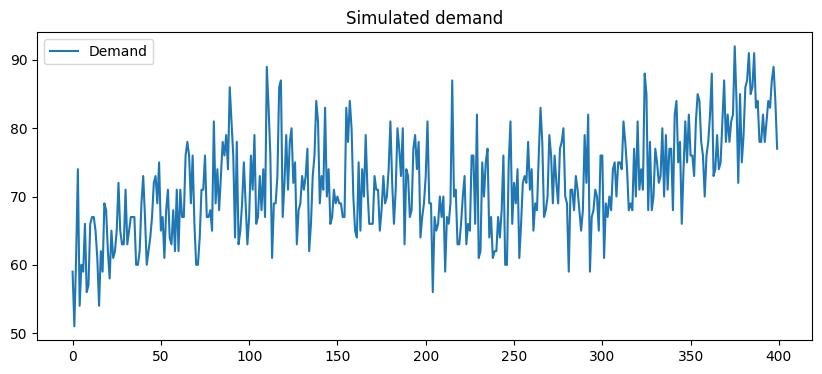

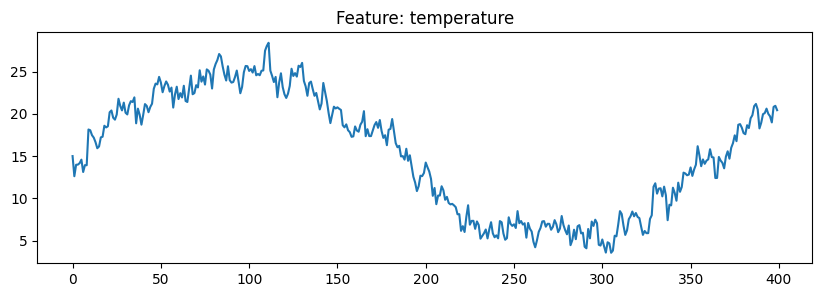

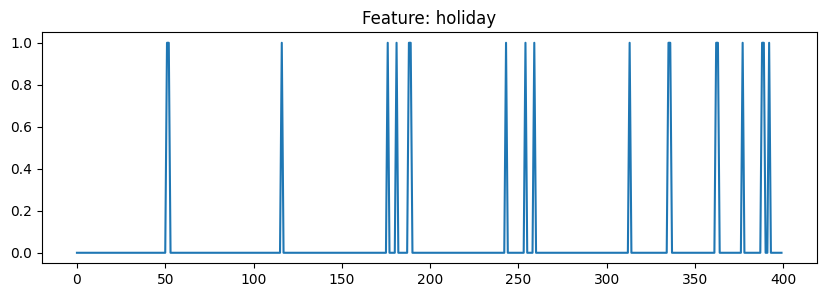

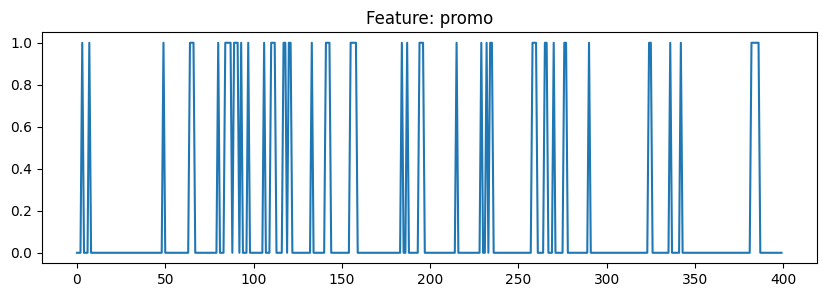

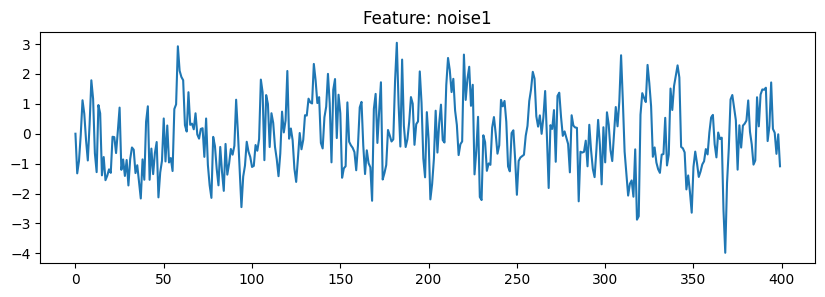

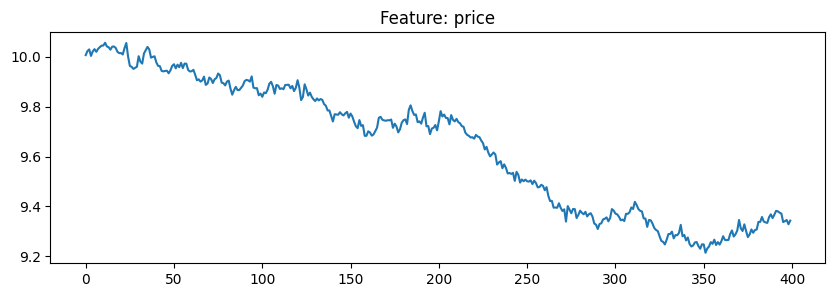

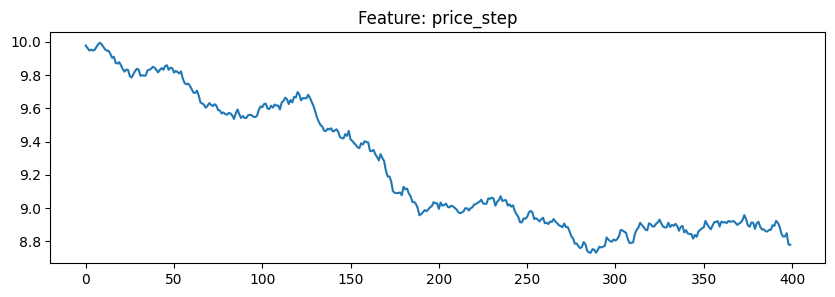

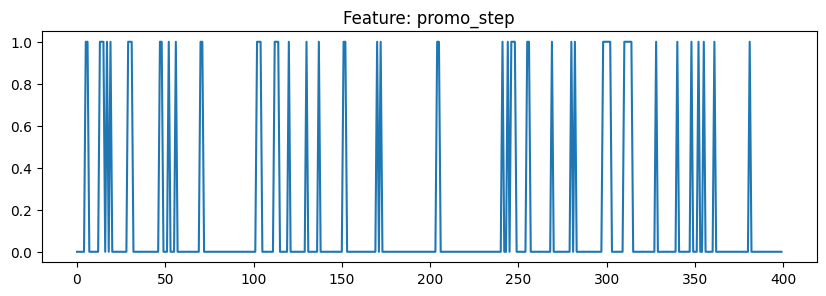

In [ ]:
import pandas as pd
from data_generation import features, simulator, utils

T = 400
# Step 1: Generate feature pool
df = pd.DataFrame({
    "price": features.price_series(T, seed=1),
    "price_step": features.price_step_function(T, seed=10),
    "promo": features.promo_series(T, seed=2),
    "promo_step": features.promotion_step_function(T, seed=20),
    "temperature": features.temperature_series(T, seed=3),
    "holiday": features.binary_holiday(T, seed=4),
    "noise1": features.ar1_feature(T, seed=5),
    "noise2": features.ar1_feature(T, phi=0.9, seed=6),
})

# Step 2: Define explanatory subset and coefficients
explanatory = [ "temperature", "promo"] #price, promo, holiday
betas = {"price": -1.2, "promo": 10.0, "temperature": 0.5, "holiday": 15.0}

# Step 3: Generate demand
df["demand"] = simulator.generate_demand(
    df, explanatory, betas,
    base_level=50, trend_slope=0.05,
    season_strength=8.0, epsilon_std=4.0, seed=42
)

# Step 4: Quick plots
utils.plot_demand(df)
utils.plot_feature(df, "temperature")
utils.plot_feature(df, "holiday")
utils.plot_feature(df, "promo")
utils.plot_feature(df, "noise1")
utils.plot_feature(df, "price")
utils.plot_feature(df, "price_step")
utils.plot_feature(df, "promo_step")


# Step 5: Save to parquet
df.to_parquet("data/test_run_1.parquet")

In [4]:
df

,price,price_step,promo,promo_step,temperature,holiday,noise1,noise2,demand
0,10.006912,9.977933,0,0,15.000000,0,0.000000,0.000000,59.0
1,10.023344,9.963433,0,0,12.616469,0,-1.324359,1.776491,51.0
2,10.029953,9.947797,0,0,13.973349,0,-0.910541,-0.954450,61.0
3,10.003890,9.953136,1,0,13.988820,0,-0.034825,-0.996970,74.0
4,10.021997,9.948165,0,0,14.166212,0,1.118634,0.116447,54.0
...,...,...,...,...,...,...,...,...,...
395,9.337414,8.829108,0,0,19.708211,0,0.161097,-1.696277,83.0
396,9.341189,8.830879,0,0,18.983639,0,0.033441,-0.458616,87.0
397,9.345881,8.849929,0,0,20.823907,0,-0.672438,-0.810149,89.0
398,9.328570,8.781312,0,0,20.951272,0,-0.019208,-0.901698,84.0
